# 2. A program that has the feature to store each epoch checkpoint and statistcal measures such as accuracy, loss in csv file

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('wines.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic_acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity_of_ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total_phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid_phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color_intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280-OD315_of_diluted_wines  178 non-null    float64
 13  Proli

In [4]:
y = df['Class']

In [5]:
y.value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [6]:
y_cat = pd.get_dummies(y)

In [7]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Class, Length: 178, dtype: int64

In [8]:
df.columns

Index(['Class', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       'OD280-OD315_of_diluted_wines', 'Proline'],
      dtype='object')

In [9]:
X = df.drop('Class' , axis=1)

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic_acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280-OD315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

In [11]:
import seaborn as sns

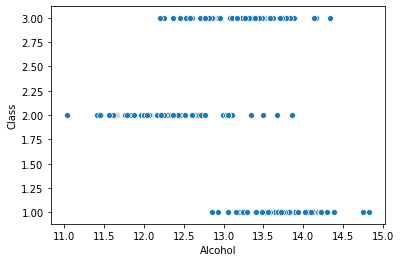

In [12]:
sns.scatterplot(x='Alcohol' , y=y , data=df)

In [13]:
from keras.models import Sequential

In [14]:
model  =  Sequential()

In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       178 non-null    float64
 1   Malic_acid                    178 non-null    float64
 2   Ash                           178 non-null    float64
 3   Alcalinity_of_ash             178 non-null    float64
 4   Magnesium                     178 non-null    int64  
 5   Total_phenols                 178 non-null    float64
 6   Flavanoids                    178 non-null    float64
 7   Nonflavanoid_phenols          178 non-null    float64
 8   Proanthocyanins               178 non-null    float64
 9   Color_intensity               178 non-null    float64
 10  Hue                           178 non-null    float64
 11  OD280-OD315_of_diluted_wines  178 non-null    float64
 12  Proline                       178 non-null    int64  
dtypes: fl

In [39]:
X.shape

(178, 13)

In [40]:
y_cat.shape

(178, 3)

In [16]:
from keras.layers import Dense

In [20]:
model.add(Dense(units=5 , input_shape=(13,), 
                activation='relu', 
                kernel_initializer='he_normal' ))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 70        
Total params: 70
Trainable params: 70
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.add(Dense(units=8 , 
                activation='relu', 
                kernel_initializer='he_normal' ))

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 70        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 48        
Total params: 118
Trainable params: 118
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.add(Dense(units=2, 
                activation='relu', 
                kernel_initializer='he_normal' ))

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 70        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
Total params: 136
Trainable params: 136
Non-trainable params: 0
_________________________________________________________________


In [26]:
    model.add(Dense(units=3, activation='softmax'))

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 5)                 70        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 48        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 18        
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 9         
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.optimizers import RMSprop

In [30]:
model.compile(optimizer=RMSprop(learning_rate=0.01),  
              loss='categorical_crossentropy',
             metrics=['accuracy']
             )

In [34]:
model.layers[0].input

<tf.Tensor 'dense_1_input:0' shape=(None, 13) dtype=float32>

In [37]:
model.layers[3].output

<tf.Tensor 'dense_4/Softmax:0' shape=(None, 3) dtype=float32>

In [38]:
model.layers[2].output

<tf.Tensor 'dense_3/Relu:0' shape=(None, 2) dtype=float32>

In [45]:
model.fit(X,y_cat, epochs=100)

Epoch 1/100
178/178 [==============================] - 0s 67us/step - loss: 1.0865 - accuracy: 0.3989
Epoch 2/100
178/178 [==============================] - 0s 62us/step - loss: 1.0871 - accuracy: 0.3989
Epoch 3/100
178/178 [==============================] - 0s 34us/step - loss: 1.0869 - accuracy: 0.3989
Epoch 4/100
178/178 [==============================] - 0s 39us/step - loss: 1.0864 - accuracy: 0.3989
Epoch 5/100
178/178 [==============================] - 0s 62us/step - loss: 1.0882 - accuracy: 0.3989
Epoch 6/100
178/178 [==============================] - 0s 62us/step - loss: 1.0874 - accuracy: 0.3989
Epoch 7/100
178/178 [==============================] - 0s 62us/step - loss: 1.0868 - accuracy: 0.3989
Epoch 8/100
178/178 [==============================] - 0s 84us/step - loss: 1.0881 - accuracy: 0.3989
Epoch 9/100
178/178 [==============================] - 0s 62us/step - loss: 1.0868 - accuracy: 0.3989
Epoch 10/100
178/178 [==============================] - 0s 67us/step - loss: 1.086

In [43]:
# import keras.backend as K

In [44]:
# K.clear_session()

In [46]:
model.get_weights()

[array([[ 0.6672286 ,  0.31065583, -0.51887786, -0.36774755, -0.14354806],
        [-0.15070722,  0.13864109,  0.8223346 , -0.2329582 ,  0.56029683],
        [-0.2174885 , -0.5182729 , -0.5012296 ,  0.7781268 ,  0.18377487],
        [-0.5463403 , -0.07881994, -0.40233377,  0.20674543, -0.2628434 ],
        [-0.11754766,  0.57926965, -0.45901397,  0.02129013, -0.4378468 ],
        [ 0.6255206 ,  0.16080748, -0.3232614 ,  0.27280965, -0.44788238],
        [ 0.0204524 ,  0.4959563 , -0.39534795, -0.87510514, -0.00695543],
        [ 0.19136877,  0.58354867, -0.28788528, -0.38562697,  0.01445699],
        [ 0.42033738,  0.16018827, -0.5775095 , -0.1118138 , -0.3932902 ],
        [-0.7945909 ,  0.678612  ,  0.15391618,  0.22994135, -0.2339575 ],
        [ 0.09660098, -0.19645052,  0.7186744 ,  0.15194854, -0.33304125],
        [-0.12299231, -0.4433374 ,  0.18455514,  0.50714046, -0.00710677],
        [-0.718566  ,  0.7424265 ,  0.14443125, -0.18335868, -0.2252231 ]],
       dtype=float32),
 

In [47]:
model.save('modelsave.h5')